# Importing the Dataset

In [60]:
IMAGE_DIR = "/kaggle/input/brain-tumor-mri-dataset/brain_tumor_dataset/brain_tumor_segmentation/train/images"
LABEL_DIR = "/kaggle/input/brain-tumor-mri-dataset/brain_tumor_dataset/brain_tumor_segmentation/train/labels"

# Libraries imported

In [61]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu, threshold_sauvola

# Dice and jaccard score was defined by the given formulas in class

i just played with the constant value in the denominator from the range 1e-4 to 1e-8 i get decent result with one of the thresholding method at 1e-5 so i kept it like that. as mentioned in the class we use this constant to the denominator for not getting it to 0.

In [62]:
def dice_score(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2 * intersection) / (np.sum(y_true) + np.sum(y_pred) + 1e-5)

def jaccard_score(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return intersection / (union + 1e-5)

> here i'm converting the labels to mast by using yolo_seg_to_mask so i can use that mask for evaluation

In [63]:
def yolo_seg_to_mask(label_path, img_shape):
    h, w = img_shape
    mask = np.zeros((h, w), dtype=np.uint8)

    with open(label_path, "r") as f:
        for line in f:
            values = list(map(float, line.split()))
            coords = values[1:]

            points = []
            for i in range(0, len(coords), 2):
                x = int(coords[i] * w)
                y = int(coords[i+1] * h)
                points.append([x, y])

            points = np.array(points, dtype=np.int32)
            cv2.fillPoly(mask, [points], 1)

    return mask

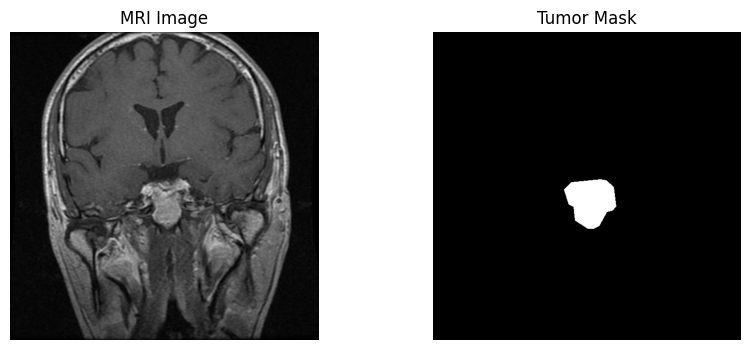

In [79]:
img_name = sorted(os.listdir(IMAGE_DIR))[15]

image = cv2.imread(os.path.join(IMAGE_DIR, img_name), cv2.IMREAD_GRAYSCALE)
label_name = os.path.splitext(img_name)[0] + ".txt"
mask = yolo_seg_to_mask(os.path.join(LABEL_DIR, label_name), image.shape)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("MRI Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Tumor Mask")
plt.imshow(mask, cmap="gray")
plt.axis("off")

plt.show()


In [65]:
dice_otsu, jaccard_otsu = [], []

for img_name in sorted(os.listdir(IMAGE_DIR)):
    image = cv2.imread(os.path.join(IMAGE_DIR, img_name), cv2.IMREAD_GRAYSCALE)
    label_name = os.path.splitext(img_name)[0] + ".txt"
    mask = yolo_seg_to_mask(os.path.join(LABEL_DIR, label_name), image.shape)

    image = cv2.resize(image, (256,256))
    mask = cv2.resize(mask, (256,256))
    mask = (mask > 0).astype(np.uint8)


    otsu_seg = (image > threshold_otsu(image)).astype(np.uint8)

    dice_otsu.append(dice_score(mask, otsu_seg))
    jaccard_otsu.append(jaccard_score(mask, otsu_seg))

print("OTSU RESULTS")
print("Dice:", np.mean(dice_otsu))
print("Jaccard:", np.mean(jaccard_otsu))


OTSU RESULTS
Dice: 0.10161079299828796
Jaccard: 0.05791598791923496


In [66]:
dice_sauvola, jaccard_sauvola = [], []

for img_name in sorted(os.listdir(IMAGE_DIR)):
    image = cv2.imread(os.path.join(IMAGE_DIR, img_name), cv2.IMREAD_GRAYSCALE)
    label_name = os.path.splitext(img_name)[0] + ".txt"
    mask = yolo_seg_to_mask(os.path.join(LABEL_DIR, label_name), image.shape)

    image = cv2.resize(image, (256,256))
    mask = cv2.resize(mask, (256,256))
    mask = (mask > 0).astype(np.uint8)


    sauvola_seg = (image > threshold_sauvola(image, window_size=25)).astype(np.uint8)

    dice_sauvola.append(dice_score(mask, sauvola_seg))
    jaccard_sauvola.append(jaccard_score(mask, sauvola_seg))

print("SAUVOLA RESULTS")
print("Dice:", np.mean(dice_sauvola))
print("Jaccard:", np.mean(jaccard_sauvola))


SAUVOLA RESULTS
Dice: 0.0649696823650804
Jaccard: 0.034597289974672936


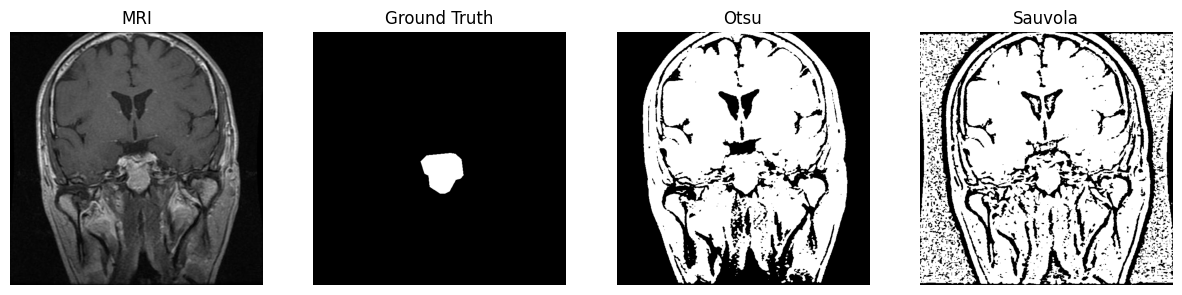

In [80]:
img_name = sorted(os.listdir(IMAGE_DIR))[15]

image = cv2.imread(os.path.join(IMAGE_DIR, img_name), cv2.IMREAD_GRAYSCALE)
label_name = os.path.splitext(img_name)[0] + ".txt"
mask = yolo_seg_to_mask(os.path.join(LABEL_DIR, label_name), image.shape)

otsu_seg = (image > threshold_otsu(image)).astype(np.uint8)
sauvola_seg = (image > threshold_sauvola(image, 25)).astype(np.uint8)

plt.figure(figsize=(15,4))

plt.subplot(1,4,1)
plt.title("MRI")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1,4,2)
plt.title("Ground Truth")
plt.imshow(mask, cmap="gray")
plt.axis("off")

plt.subplot(1,4,3)
plt.title("Otsu")
plt.imshow(otsu_seg, cmap="gray")
plt.axis("off")

plt.subplot(1,4,4)
plt.title("Sauvola")
plt.imshow(sauvola_seg, cmap="gray")
plt.axis("off")

plt.show()